**Prepare rules for the all the data sets** <br>
1) Try different values of support and confidence. Observe the change in number of rules for different support, confidence values <br>
2) Change the minimum length in apriori algorithm <br>
3) Visulize the obtained rules using different plots 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

#### Read data file

In [2]:
groceries = []

with open("groceries.csv") as f:
    groceries = f.read()

groceries

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

In [3]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")

# Remove null element from the list
while("" in groceries) : 
    groceries.remove("") 
    
print(groceries)
groceries_list = []

for i in groceries:
    groceries_list.append(i.split(","))

['citrus fruit,semi-finished bread,margarine,ready soups', 'tropical fruit,yogurt,coffee', 'whole milk', 'pip fruit,yogurt,cream cheese ,meat spreads', 'other vegetables,whole milk,condensed milk,long life bakery product', 'whole milk,butter,yogurt,rice,abrasive cleaner', 'rolls/buns', 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)', 'pot plants', 'whole milk,cereals', 'tropical fruit,other vegetables,white bread,bottled water,chocolate', 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes', 'beef', 'frankfurter,rolls/buns,soda', 'chicken,tropical fruit', 'butter,sugar,fruit/vegetable juice,newspapers', 'fruit/vegetable juice', 'packaged fruit/vegetables', 'chocolate', 'specialty bar', 'other vegetables', 'butter milk,pastry', 'whole milk', 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers', 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,b

In [4]:
all_groceries_list = [i for item in groceries_list for i in item]

from collections import Counter

item_frequencies = Counter(all_groceries_list)

# after sorting
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])
item_frequencies

[('baby food', 1),
 ('sound storage medium', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('baby cosmetics', 6),
 ('frozen chicken', 6),
 ('toilet cleaner', 7),
 ('make up remover', 8),
 ('salad dressing', 8),
 ('whisky', 8),
 ('liqueur', 9),
 ('rubbing alcohol', 10),
 ('hair spray', 11),
 ('frozen fruits', 12),
 ('cream', 13),
 ('honey', 15),
 ('decalcifier', 15),
 ('organic products', 16),
 ('specialty vegetables', 17),
 ('ready soups', 18),
 ('flower soil/fertilizer', 19),
 ('prosecco', 20),
 ('cocoa drinks', 22),
 ('organic sausage', 22),
 ('pudding powder', 23),
 ('tidbits', 23),
 ('cooking chocolate', 25),
 ('soap', 26),
 ('bathroom cleaner', 27),
 ('cookware', 27),
 ('potato products', 28),
 ('fish', 29),
 ('snack products', 30),
 ('nut snack', 31),
 ('artif. sweetener', 32),
 ('canned fruit', 32),
 ('syrup', 32),
 ('nuts/prunes', 33),
 ('abrasive cleaner', 35),
 ('skin care', 35),
 ('specialty fat', 36),
 ('tea', 38),
 ('brandy', 41),
 ('light bulb

In [5]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))
items

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'berries',
 'hamburger meat',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'frozen meals',
 'misc. beverages',
 'oil',
 'butter milk',
 'specialty bar',
 'ham',
 'beverages',
 'meat',
 'ice cream',
 'sliced cheese',
 'hard cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'red/blush wine',
 'detergent',
 'white wine',
 'pickled vegetables',
 'baking powder',
 'semi-finished brea

In [6]:
df = pd.DataFrame(item_frequencies, columns = ['Grocery_Item', 'Frequency'])
df

,Grocery_Item,Frequency
0,baby food,1
1,sound storage medium,1
2,preservation products,2
3,bags,4
4,kitchen utensil,4
...,...,...
164,yogurt,1372
165,soda,1715
166,rolls/buns,1809
167,other vegetables,1903


In [7]:
df.dtypes

Grocery_Item    object
Frequency        int64
dtype: object

In [8]:
df_top10 = df.nlargest(n = 10, columns = 'Frequency')
df_top10.reset_index(drop = True)

,Grocery_Item,Frequency
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


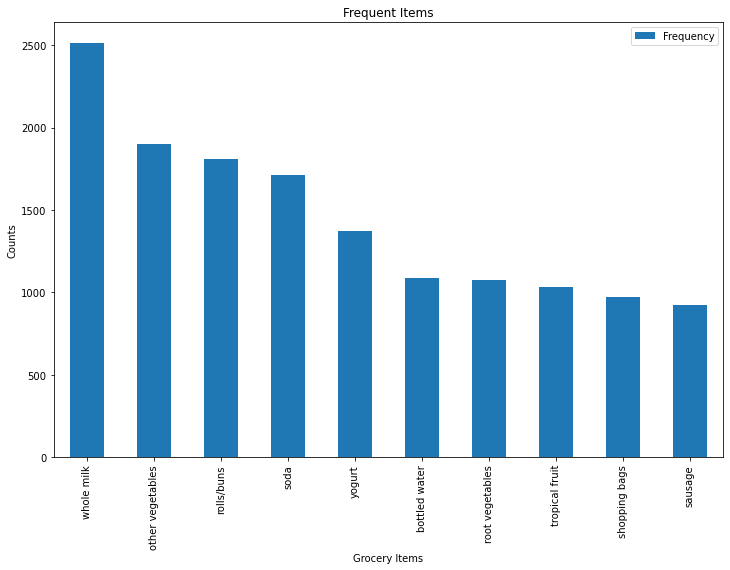

In [9]:
# barplot of top 10 grocery items
df_top10.plot(kind = 'bar', figsize = (12, 8), title = "Frequent Items")
plt.xticks(list(range(0, 10),), items[0:10], rotation = 90)
plt.xlabel("Grocery Items")
plt.ylabel("Counts")
plt.show()

In [10]:
from wordcloud import WordCloud

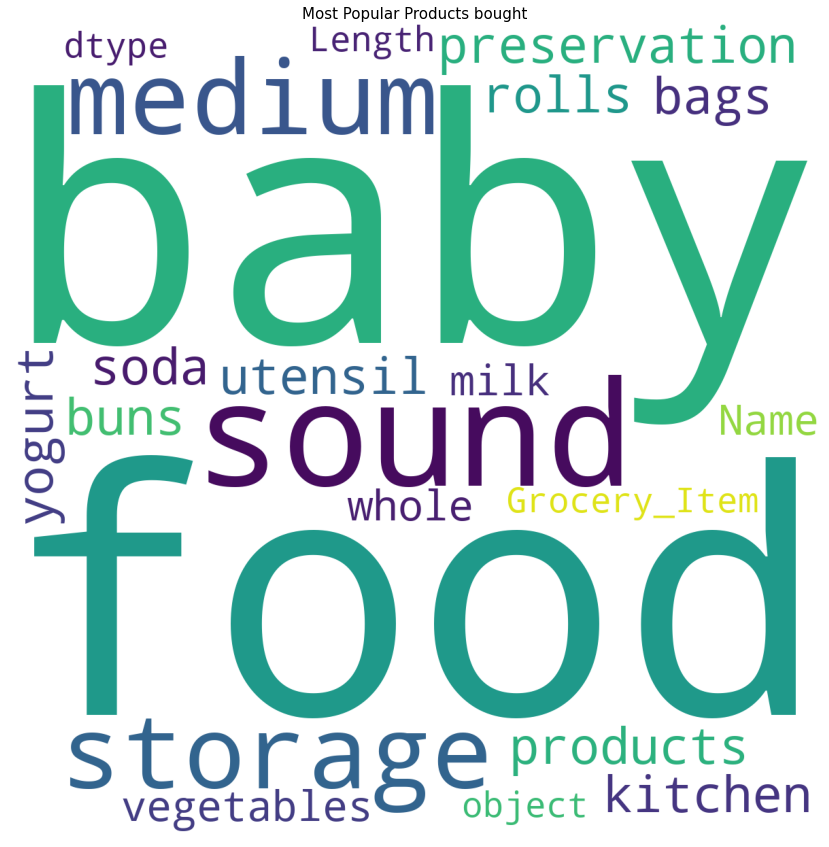

In [11]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, 
                      max_words = 121).generate(str(df['Grocery_Item']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Products bought', fontsize = 15)
plt.show()

In [12]:
# Creating Data Frame for the transactions data 

# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:len(groceries_list), :] # removing the last empty transaction

groceries_series.columns = ["transactions"]
groceries_series

,transactions
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [13]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')

X

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
frequent_itemsets = apriori(X, min_support = 0.005, max_len = 3, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
984,0.010473,"(whole milk, yogurt, soda)"
985,0.007931,"(whole milk, whipped/sour cream, tropical fruit)"
986,0.006202,"(yogurt, whipped/sour cream, tropical fruit)"
987,0.015150,"(whole milk, tropical fruit, yogurt)"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'support')

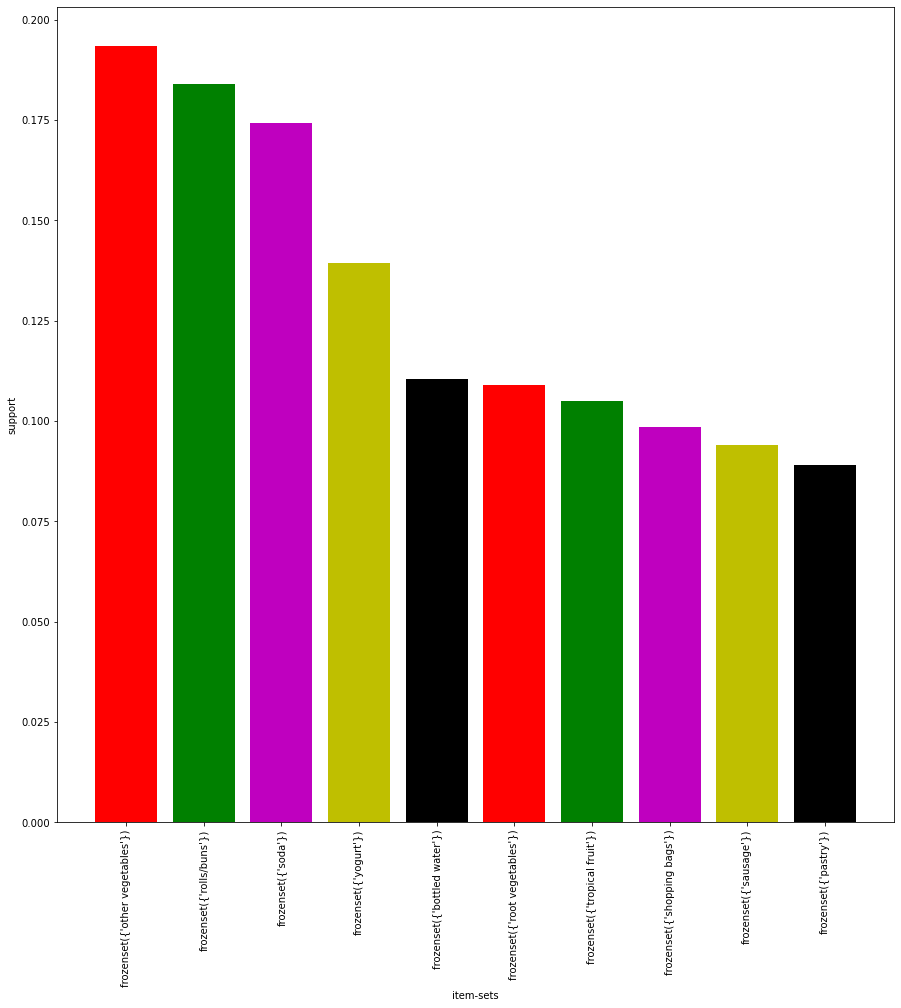

In [15]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
plt.bar(x = list(range(1, 11)), height = frequent_itemsets.support[1:11], color = 'rgmyk')
plt.xticks(list(range(1, 11)), frequent_itemsets.itemsets[1:11], rotation = 90)
plt.xlabel('item-sets');plt.ylabel('support')

In [16]:
# Declaring rules variable for association rule
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False, inplace = True)

In [17]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

In [18]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2021,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
1313,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
2040,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2207,(tropical fruit),"(citrus fruit, pip fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
776,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
1468,"(whole milk, whipped/sour cream)",(butter),0.032232,0.055414,0.006711,0.208202,3.757185,0.004925,1.192963
2436,(yogurt),"(curd, tropical fruit)",0.139502,0.010269,0.005287,0.037901,3.690645,0.003855,1.028720
1043,(root vegetables),"(beef, other vegetables)",0.108998,0.019725,0.007931,0.072761,3.688692,0.005781,1.057197
1874,(butter),"(whole milk, domestic eggs)",0.055414,0.029995,0.005999,0.108257,3.609174,0.004337,1.087763
